Import libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

First 5 records of train and test dataset to ensure it's properly imported

In [ ]:
df_train.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [ ]:
df_test.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12,140,85,33,0,37.4,0.244,41
1,411,6,102,90,39,0,35.7,0.674,28
2,639,7,97,76,32,91,40.9,0.871,32
3,213,7,179,95,31,0,34.2,0.164,60
4,181,6,87,80,0,0,23.2,0.084,32


Information for both dataset such as datatype and null values

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   154 non-null    int64  
 1   no_times_pregnant      154 non-null    int64  
 2   glucose_concentration  154 non-null    int64  
 3   blood_pressure         154 non-null    int64  
 4   skin_fold_thickness    154 non-null    int64  
 5   serum_insulin          154 non-null    int64  
 6   bmi                    154 non-null    float64
 7   diabetes pedigree      154 non-null    float64
 8   age                    154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.0 KB


In [ ]:
df_train.shape

(614, 10)

In [ ]:
df_test.shape

(154, 9)

In [ ]:
# For training dataset, there are 614 rows x 10 columns
# For testing dataset, there are 154 rows x 9 columns, the difference is the target variable in training dataset

Confirm null values

In [ ]:
null_train = df_train.isnull().sum()
null_test = df_test.isnull().sum()

print("Null values for train dataset: ", null_train)
print("Null values for test dataset: ", null_test)

Null values for train dataset:  p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64
Null values for test dataset:  p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
dtype: int64


In [ ]:
# Both datsets shows no null values

EDA

Statistics for both dataset

In [ ]:
df_train.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [ ]:
df_test.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,379.422078,3.811688,122.298701,70.461039,21.701299,81.571429,32.322078,0.493942,32.902597
std,215.338912,3.425719,34.769480,16.935917,16.213095,105.178271,7.386724,0.332439,11.090106
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,194.250000,1.000000,97.000000,64.000000,0.000000,0.000000,28.150000,0.248000,24.000000
50%,383.000000,3.000000,115.000000,72.000000,24.500000,52.000000,32.900000,0.411500,29.500000
75%,583.250000,6.000000,144.750000,78.000000,33.000000,129.500000,36.200000,0.654750,40.000000
max,738.000000,14.000000,199.000000,122.000000,99.000000,474.000000,67.100000,2.137000,66.000000


Visualizations

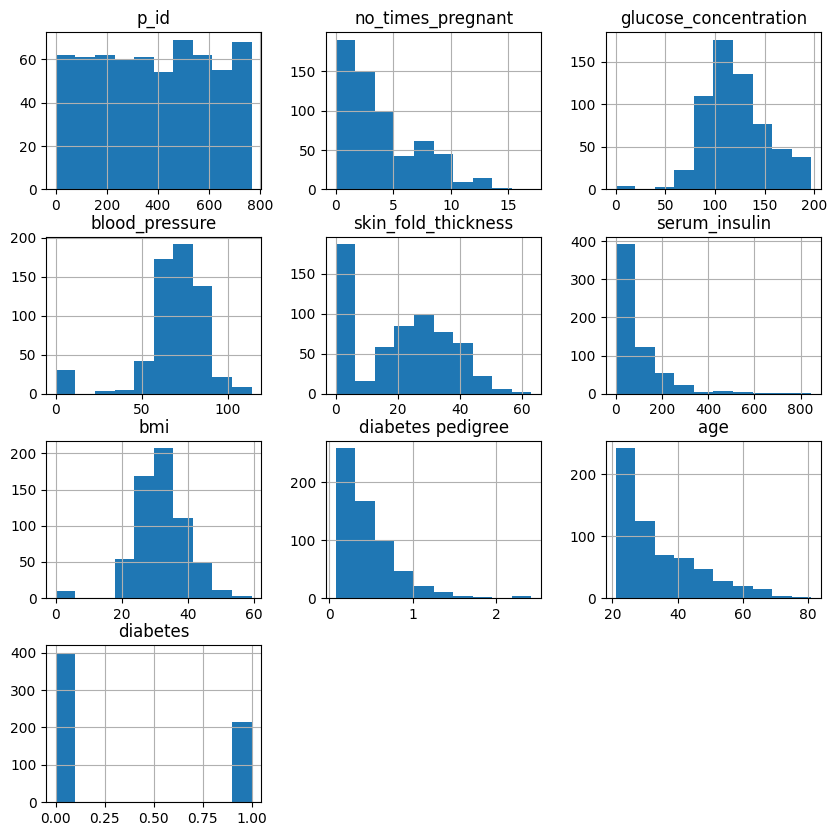

In [ ]:
df_train.hist(figsize=(10,10))
plt.show()

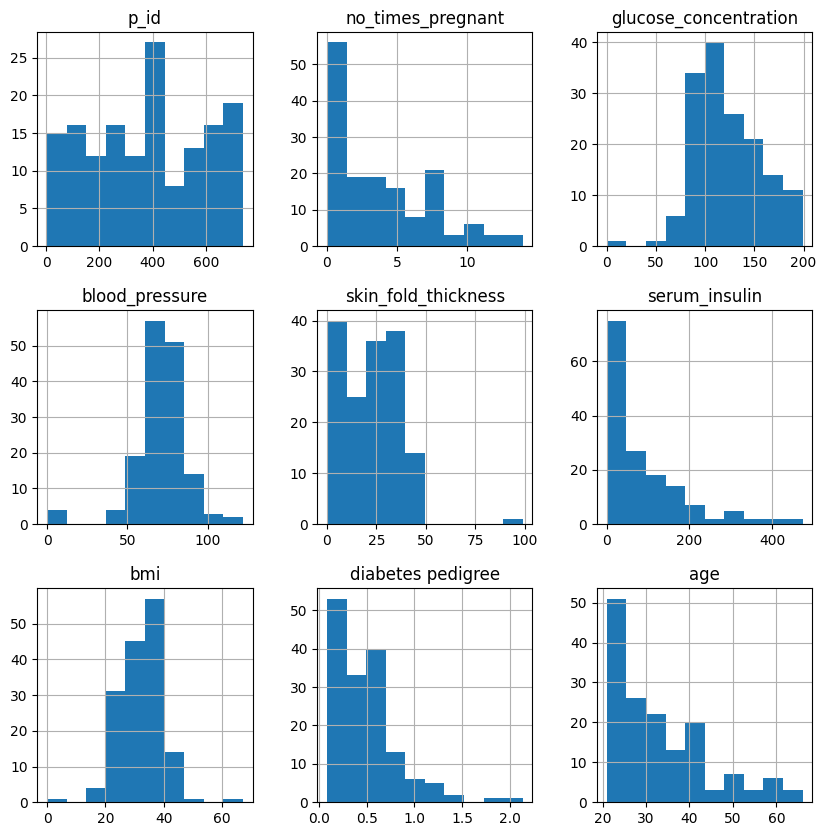

In [ ]:
df_test.hist(figsize=(10,10))
plt.show()

In [ ]:
# Bar graph shows the distribution of each variables



---



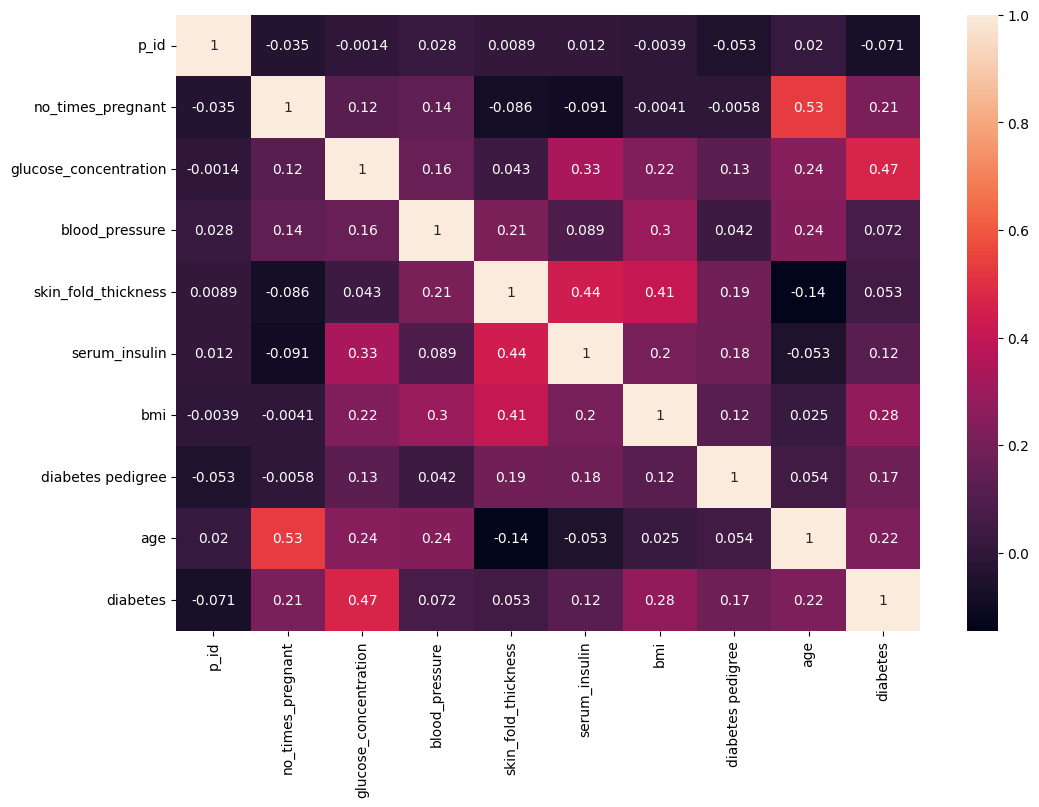

In [ ]:
plt.figure(figsize=(12,8))
corr = df_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

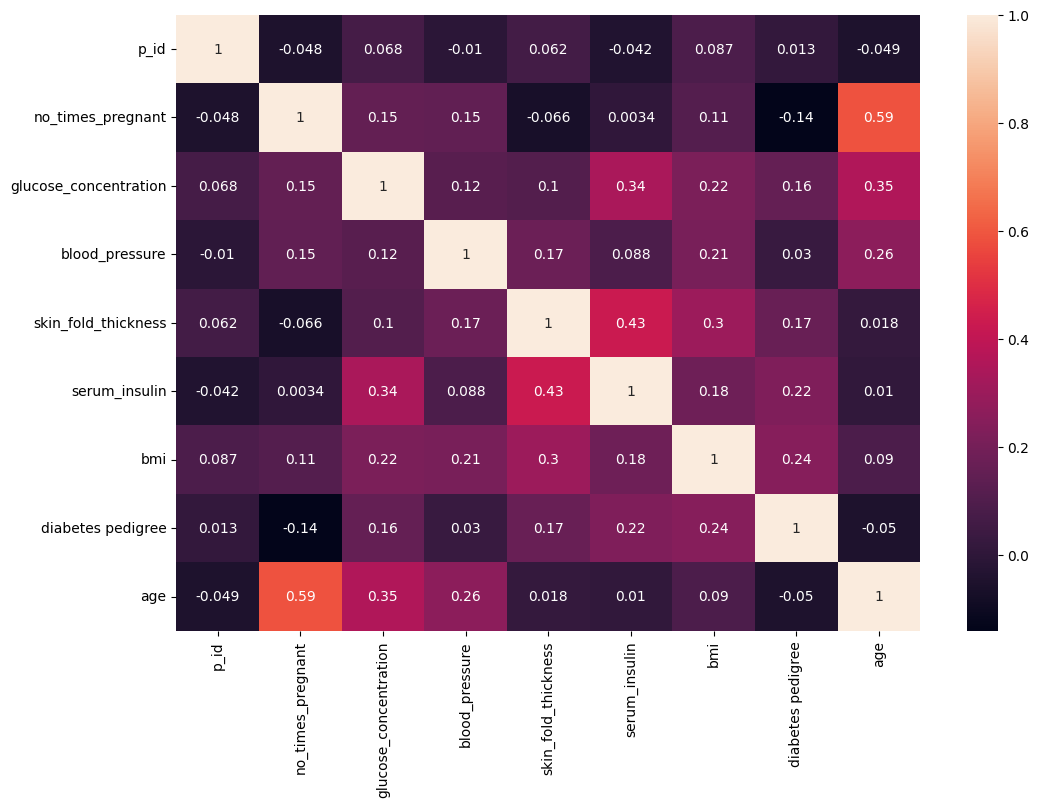

In [ ]:
plt.figure(figsize=(12,8))
corr = df_test.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# Correlation matrix shows the correlation between two numerical variables
# According to the correlation matrix from the training dataset, the top 3 highest correlations are:
  # age & no_times_pregnant (0.53), diabetes & glucose_concentration (0.47), serum_insulin & skin_fold_thickness (0.44)
# From correlation matrix for testing dataset, we can identify top 3 highest correlations are:
  # age & no_times_pregnant (0.59), serum_insulin & skin_fold_thickness (0.43), age & glucose_concentration (0.35)
  # age probably has a great influence as it highly correlated to more than one variable

# Positive correlation means if the value of the first variable increases, then the value of second variable probably increases, and vice versa
# Negative correlation means if the value of the first variable increases, then the value of second variable probably decreases, and vice versa



---



In [ ]:
X_train = df_train.drop(['p_id', 'diabetes'], axis=1)
y_train = df_train['diabetes']

X_test = df_test.drop(['p_id'], axis=1)

In [ ]:
# Dropped column 'p_id' as it does not have any meaning, just simply unique ID
# Dropped column 'diabetes' as it is the target variable

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_val_pred = model_knn.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy on validation set (KNN):", accuracy*100)

Accuracy on validation set (KNN): 62.601626016260155


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scaled, y_train)

y_val_pred_dt = model_dt.predict(X_val_scaled)

accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
print("Accuracy on validation set (Decision Tree):", accuracy_dt * 100)

Accuracy on validation set (Decision Tree): 75.60975609756098


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_val_pred_rf = model_rf.predict(X_val_scaled)

accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print("Accuracy on validation set (Random Forest):", accuracy_rf * 100)

Accuracy on validation set (Random Forest): 80.48780487804879


In [ ]:
results = pd.DataFrame({
    'Model': ['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier'],
    'Accuracy': [accuracy * 100, accuracy_dt * 100, accuracy_rf * 100]
})

print(results)

                    Model   Accuracy
0    KNeighborsClassifier  62.601626
1  DecisionTreeClassifier  75.609756
2  RandomForestClassifier  80.487805


In [ ]:
# Since the testing data doesn't have target variable, we cannot directly get the accuracy for testing data. Instead we can calculate the accuracy by splitting the training data into
# training data and validation data.
# Above table shows the comparison of accuracies between three models according to the validation data. Random Forest shows the highest accuracy for validation data with 80.49%.
# For every iteration in every model, we will restart the runtime to reset all the updated variables.

In [ ]:
# Add target variables into the testing data using the prediction from Random Forest
y_test_pred_rf = model_rf.predict(X_test_scaled)
df_test['diabetes'] = y_test_pred_rf

Check if target variable is available in the testing data

In [ ]:
print(y_test_pred_rf)

# Shows the predictions only in the testing data
# 0 - negative on diabetes
# 1 - positive on diabetes
# Values are arranged according to respective rows

[1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1
 1 1 1 0 0 1]


In [ ]:
df_test.head()

# Shows the predictions in the testing data, aligned with each rows

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,437,12,140,85,33,0,37.4,0.244,41,1
1,411,6,102,90,39,0,35.7,0.674,28,0
2,639,7,97,76,32,91,40.9,0.871,32,0
3,213,7,179,95,31,0,34.2,0.164,60,1
4,181,6,87,80,0,0,23.2,0.084,32,0


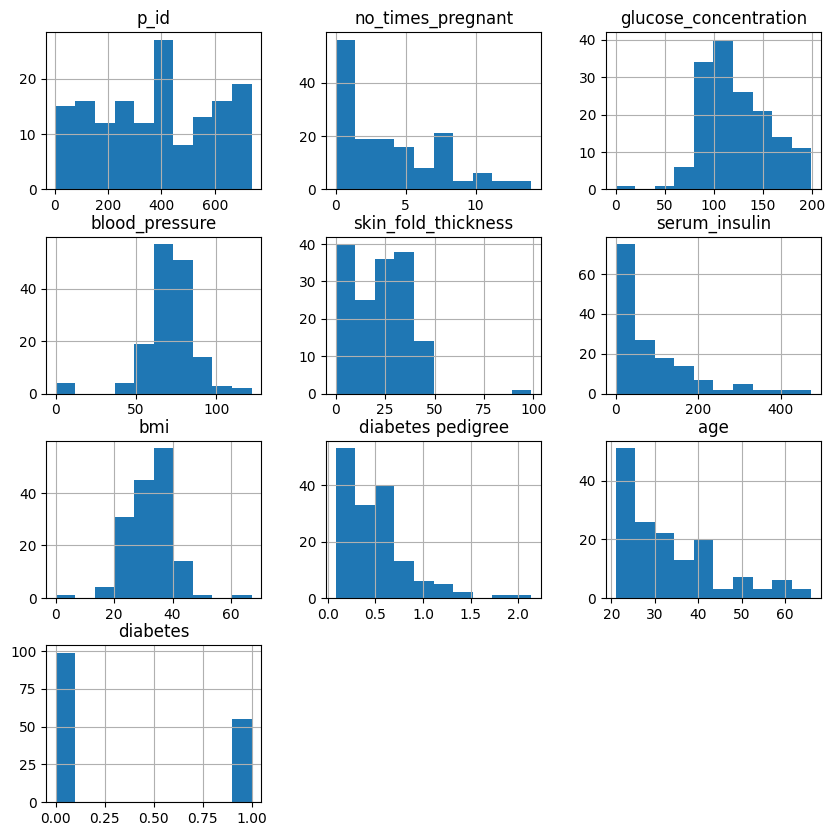

In [ ]:
df_test.hist(figsize=(10,10))
plt.show()

# Distributions of variables in the newly updated testing data. As we can see the target variable (diabetes) has been added.

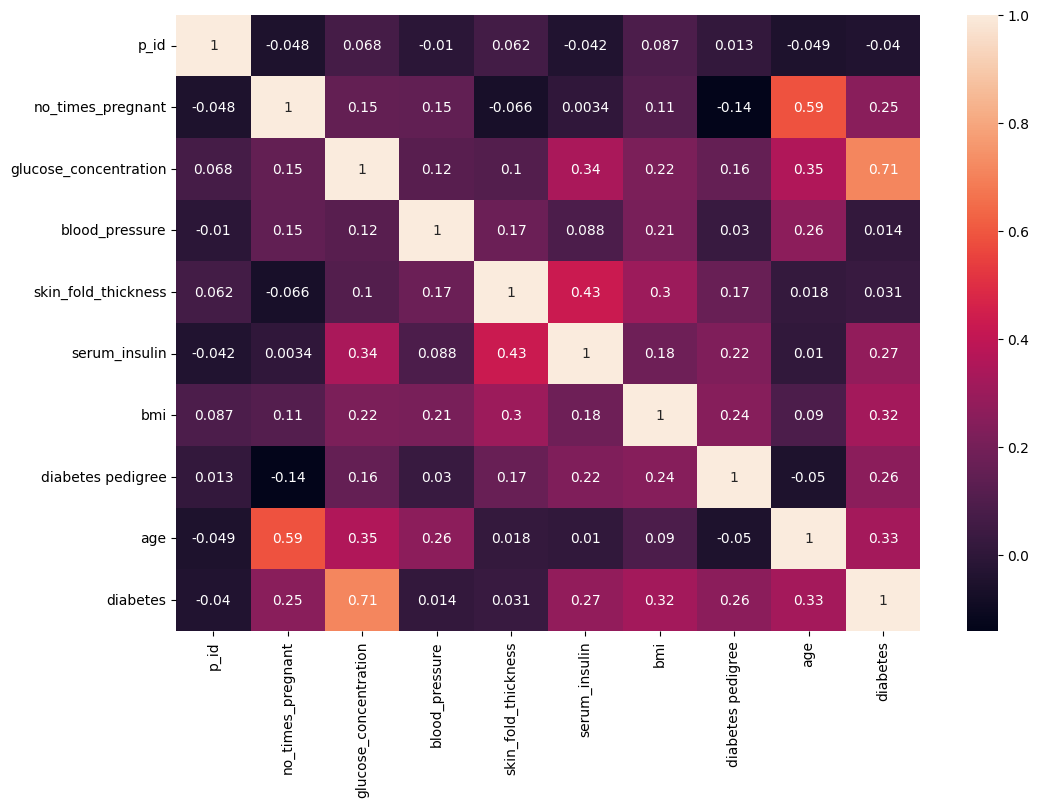

In [ ]:
plt.figure(figsize=(12,8))
corr = df_test.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Correlations between variables in the testing data. As we can see the target variable has been added.
# From this correlation matrix we can see that variable 'glucose_concentration' has the highest correlation with the target variable 'diabetes'
  # with correlation of 0.71